In [1]:
import matplotlib.pyplot as plt
import numpy as np

import DissimilarityMetrics
import ChannelChartingCore
import Evaluation

2024-10-10 17:03:27.964602: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-10 17:03:28.941603: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# This may take some time
import dichasus_cf0x

2024-10-10 17:03:31.127835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-10 17:03:31.224035: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-10 17:03:31.224410: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
# Remove CSI from all antenna arrays except array b=2
csi_time_domain_onearray = dichasus_cf0x.csi_time_domain[:,1][:,np.newaxis]

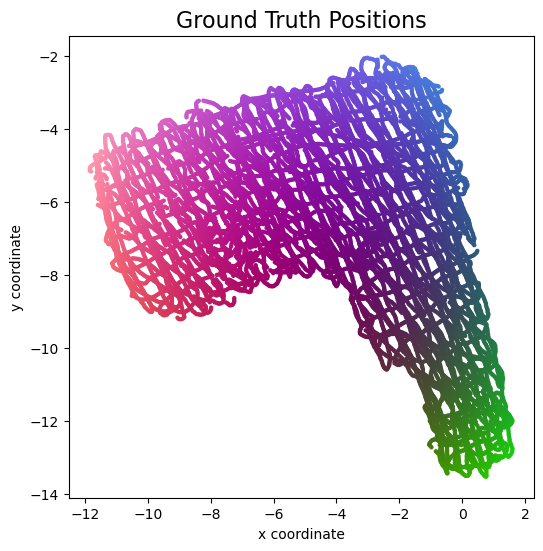

In [4]:
Evaluation.plot_colorized(dichasus_cf0x.groundtruth_positions, dichasus_cf0x.groundtruth_positions, title="Ground Truth Positions")

In [5]:
def mean_variance_from_delta_adp(delta_adp):
    mean = np.where(delta_adp < 1, 0,
           np.where(np.logical_and(delta_adp >= 1, delta_adp < 2), 0.01 * delta_adp + 0.01, 
           #np.where(np.logical_and(delta_adp >= 4, delta_adp < 5), 0.01 * delta_adp + 0.01,
           np.where(delta_adp > 2, np.inf, np.nan)))

    variance = np.where(delta_adp < 1, 0.0001,
       np.where(np.logical_and(delta_adp >= 1, delta_adp < 2), 0.0002 + 0.00005 * delta_adp, 
       #np.where(np.logical_and(delta_adp >= 4, delta_adp < 5), 0.0008,
       np.where(delta_adp > 2, 10000, np.nan)))

    return mean, variance

adp_metric = DissimilarityMetrics.ADPDissimilarityMetric(csi_time_domain_onearray, mean_variance_from_delta_adp)

In [6]:
velocity_mean = 0.235
velocity_variance = 0.0015 # TODO: Use this significantly lower variance in single-antenna model?

# Make worste-case assumption of perfectly correlated velocities. This maximizes the variance.
velocity_metric = DissimilarityMetrics.VelocityDissimilarityMetric(velocity_mean, velocity_variance, True, dichasus_cf0x.timestamps)

In [7]:
GDM = ChannelChartingCore.GaussianDissimilarityModel([adp_metric, velocity_metric], enable_path_contraction = False)
GDM.generate_short_paths(realization_count = 8)

  0%|          | 0/8 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Generating dissimilarity realizations...


  0%|          | 0/2 [00:00<?, ?it/s]

Choosing smallest dissimilarity realization pair-wise...
Running shortest path algorithm...


Computing Shortest Paths:   0%|          | 0/104255000 [00:00<?, ?it/s]

Preparing Dijkstra Inputs:   0%|          | 0/5000 [00:00<?, ?it/s]

Starting Processes:   0%|          | 0/10 [00:00<?, ?it/s]

Determining longest short path...


Computing longest paths:   0%|          | 0/40000 [00:00<?, ?it/s]

Preparing tasks:   0%|          | 0/40000 [00:00<?, ?it/s]

Starting processes:   0%|          | 0/16 [00:00<?, ?it/s]

Longest short path has 247 hops


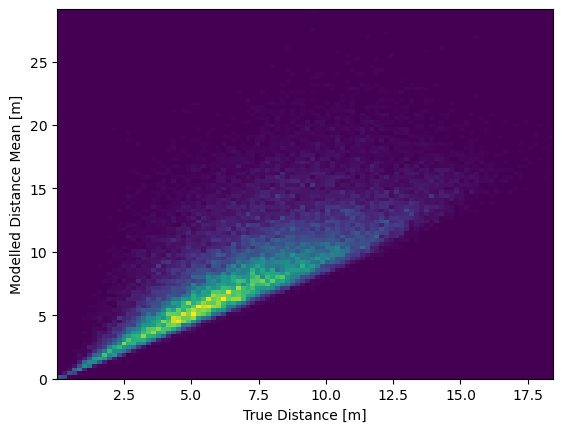

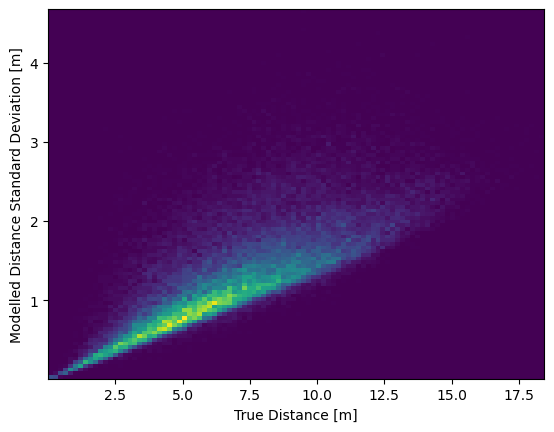

In [12]:
paths, path_hops, paths_d_mean, paths_d_variance = GDM.get_random_short_paths(50000)
groundtruth_distance_matrix = np.sqrt(np.sum((dichasus_cf0x.groundtruth_positions[:,np.newaxis,:] - dichasus_cf0x.groundtruth_positions[np.newaxis,:,:])**2, axis = -1))
groundtruth_dist = np.sum(groundtruth_distance_matrix[paths[:,:-1], paths[:,1:]], axis = 1).flatten()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Mean [m]")
plt.hist2d(groundtruth_dist, paths_d_mean, bins = 100)
plt.show()

plt.xlabel("True Distance [m]")
plt.ylabel("Modelled Distance Standard Deviation [m]")
plt.hist2d(groundtruth_dist, np.sqrt(paths_d_variance), bins = 100)
plt.show()

In [91]:
BATCH_SIZE = 3000
LEARNING_RATE_INITIAL = 2e-2
LEARNING_RATE_FINAL = 1e-2
MIN_PATHHOPS = 3
MAX_PATHHOPS = 8
TRAINING_BATCHES = 2000
ACCELERATION_MEAN = 0.8
ACCELERATION_VARIANCE = 1.7
ACCELERATION_WEIGHT = 0.04

#ACCELERATION_WEIGHT = 0.04 --> MAE = 0.9688
#ACCELERATION_WEIGHT = 0.00 --> MAE = 1.1641

# Now velocity_variance = 0.002 --> MAE = 0.7885m, wow! Lower velocity variance definitely better!
# ACCELERATION_WEIGHT = 0.04 --> MAE = 0.7114
# ACCELERATION_WEIGHT = 0.01 --> MAE = 0.7564
# ACCELERATION_WEIGHT = 0.02, MIN_PATHHOPS = 2, MAX_PATHHOPS = 4 --> MAE = 0.8343

# Now velocity_variance = 0.001
# ACCELERATION_WEIGHT = 0.04, MIN_PATHHOPS = 1, MAX_PATHHOPS = 10 --> MAE = 0.7101
# MAX_PATHHOPS = 5 --> MAE = 0.7650
# MAX_PATHHOPS = 20 --> MAE = 0.7869

# Now velocity_variance = 0.002
# MAX_PATHHOPS = 20 --> MAE = 0.943m
# MAX_PATHHOPS = 10, BATCH_SIZE = 4000 --> MAE = 0.898m
# MAX_PATHHOPS = 5, BATCH_SIZE = 4000, ACCELERATION_MEAN = 0.4 --> MAE = whatever, bad

# Now velocity_variance = 0.002, but NO PATH CONTRACTION
# MAX_PATHHOPS = 5, BATCH_SIZE = 3000, ACCELERATION_MEAN = 0.8 --> MAE = 0.6879
# MIN_PATHHOPS = 2, MAX_PATHHOPS = 4, BATCH_SIZE = 3000, ACCELERATION_MEAN = 0.8 --> MAE = 0.7440

# Now velocity_variance = 0.0015
# MIN_PATHHOPS = 1, MAX_PATHHOPS = 5, BATCH_SIZE = 3000, ACCELERATION_MEAN = 0.8 --> MAE = 0.6681

# Now velocity_variance = 0.0015, but number of path hops is random!
# MIN_PATHHOPS = 1, MAX_PATHHOPS = 10, BATCH_SIZE = 3000, ACCELERATION_MEAN = 0.8 --> MAE = 0.6385, wow!!!
# MIN_PATHHOPS = 1, MAX_PATHHOPS = 20, BATCH_SIZE = 3000, ACCELERATION_MEAN = 0.8 --> MAE = 0.7489
# MIN_PATHHOPS = 5, MAX_PATHHOPS = 10, BATCH_SIZE = 3000, ACCELERATION_MEAN = 0.8 --> MAE = 0.6716
# MIN_PATHHOPS = 3, MAX_PATHHOPS = 8, BATCH_SIZE = 3000, ACCELERATION_MEAN = 0.8 --> MAE = 0.6211, wow!!!
# MIN_PATHHOPS = 3, MAX_PATHHOPS = 8, LEARNING_RATE_INITIAL = 2e-2, LEARNING_RATE_FINAL = 4e-3 --> MAE = 0.6694
# MIN_PATHHOPS = 3, MAX_PATHHOPS = 8, LEARNING_RATE_INITIAL = 2e-2, LEARNING_RATE_FINAL = 1e-2 --> MAE = 0.6814
# same as above, but BATCH_SIZE = 6000 (instead of 3000) --> MAE = 0.8514



 199/2000 [=>............................] - ETA: 3:15 - loss: 18.9211 - metric: 0.0000e+00

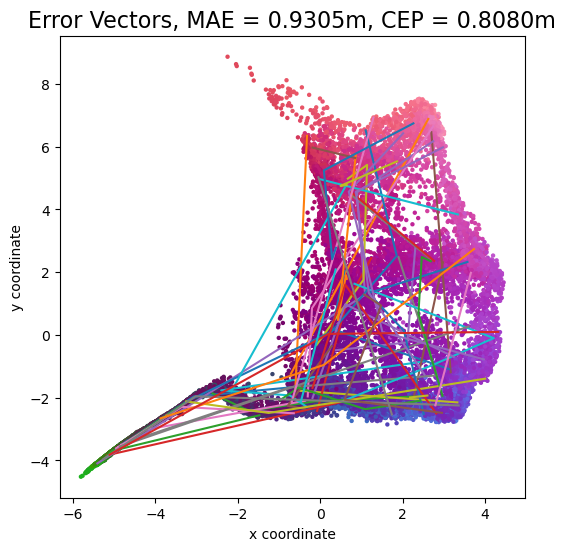

 399/2000 [====>.........................] - ETA: 2:54 - loss: 16.2721 - metric: 0.0000e+00

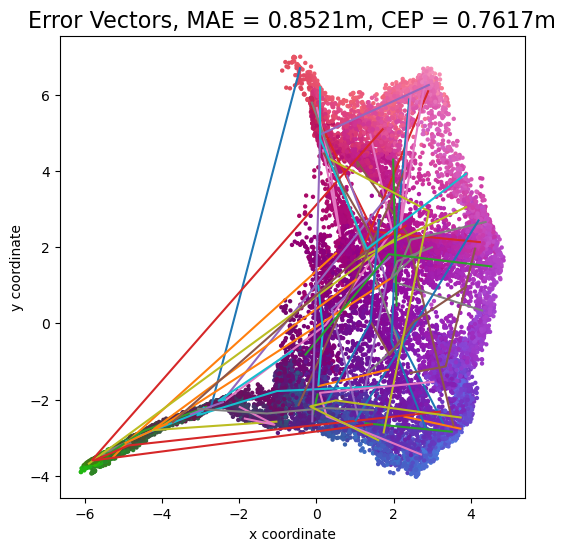

 599/2000 [=======>......................] - ETA: 2:32 - loss: 15.0206 - metric: 0.0000e+00

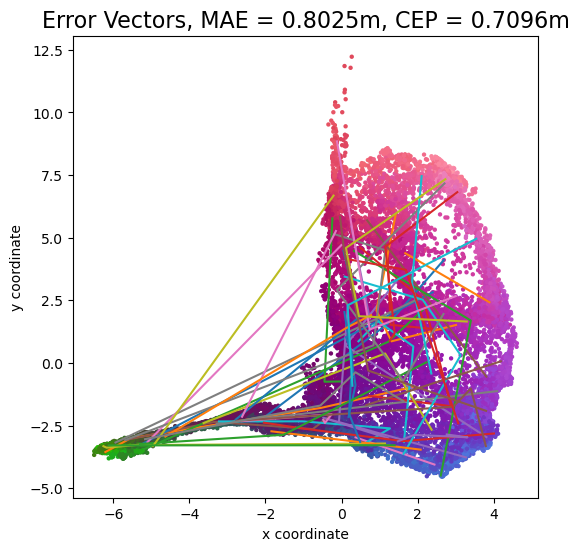

 799/2000 [==========>...................] - ETA: 2:11 - loss: 14.1576 - metric: 0.0000e+00

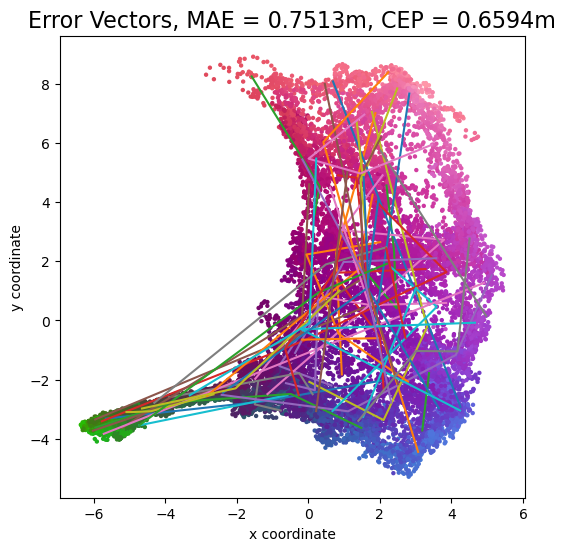

 999/2000 [=============>................] - ETA: 1:49 - loss: 13.5491 - metric: 0.0000e+00

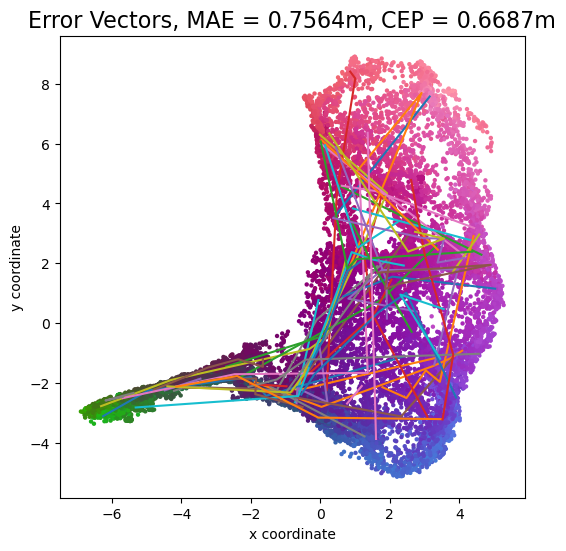

1199/2000 [================>.............] - ETA: 1:28 - loss: 13.1702 - metric: 0.0000e+00

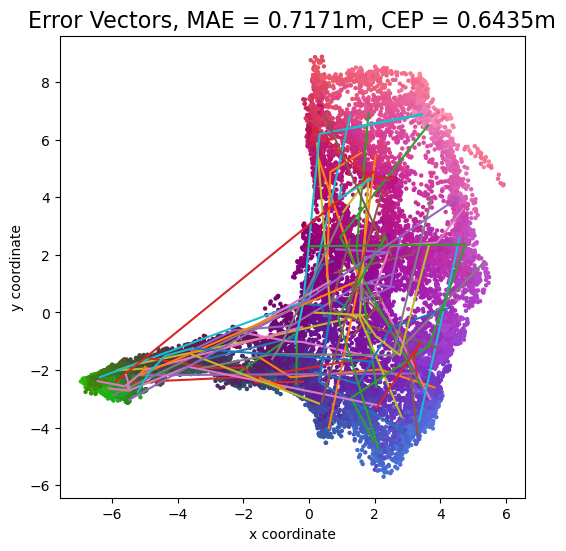

1399/2000 [===================>..........] - ETA: 1:05 - loss: 12.7059 - metric: 0.0000e+00

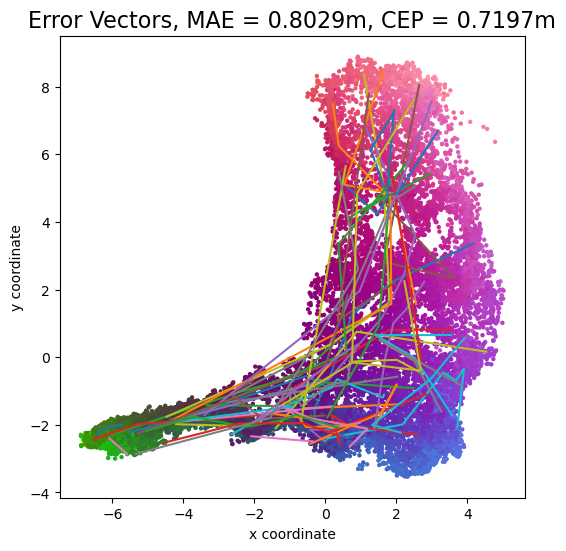

1599/2000 [======================>.......] - ETA: 43s - loss: 12.3003 - metric: 0.0000e+00

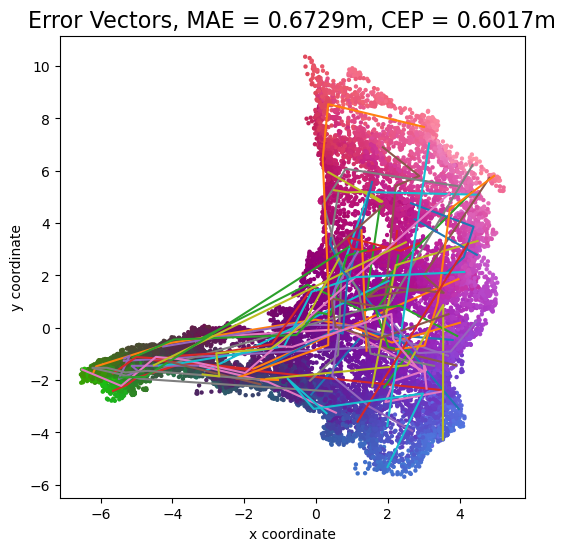

1799/2000 [=========================>....] - ETA: 22s - loss: 11.8630 - metric: 0.0000e+00

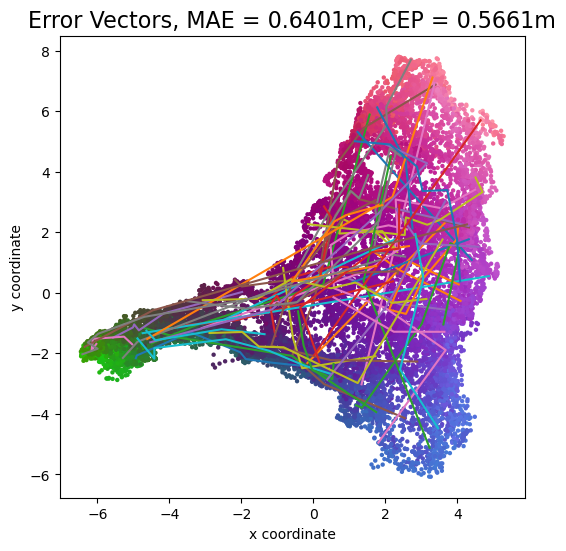

1999/2000 [============================>.] - ETA: 0s - loss: 11.4860 - metric: 0.0000e+00

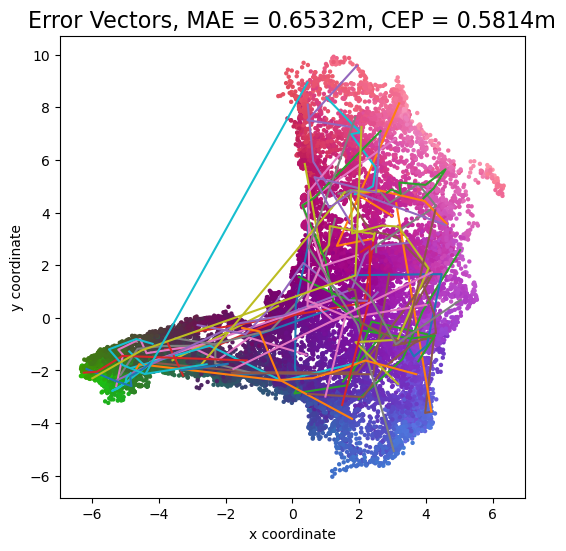

2000/2000 [==============================] - 223s 110ms/step - loss: 11.4839 - metric: 0.0000e+00


In [92]:
plot_callback = Evaluation.PlotChartCallback(dichasus_cf0x.groundtruth_positions, csi_time_domain_onearray.shape[0], BATCH_SIZE, MAX_PATHHOPS)
cc = ChannelChartingCore.ChannelChart(GDM, csi_time_domain_onearray, dichasus_cf0x.timestamps, batch_size = BATCH_SIZE, learning_rate_initial = LEARNING_RATE_INITIAL, learning_rate_final = LEARNING_RATE_FINAL, min_pathhops = MIN_PATHHOPS, max_pathhops = MAX_PATHHOPS, randomize_pathhops = True, training_batches = TRAINING_BATCHES, plot_callback = plot_callback, acceleration_mean = ACCELERATION_MEAN, acceleration_variance = ACCELERATION_VARIANCE, acceleration_weight = ACCELERATION_WEIGHT)

In [93]:
channel_chart_positions = cc.predict(csi_time_domain_onearray)

652/652 [==============================] - 1s 2ms/step


In [94]:
ct, tw, ks = Evaluation.ct_tw_ks_on_subset(dichasus_cf0x.groundtruth_positions, channel_chart_positions)
print(f"CT: {ct:.4f}\nTW: {tw:.4f}\nKS: {ks:.4f}")

CT: 0.9859
TW: 0.9873
KS: 0.1386


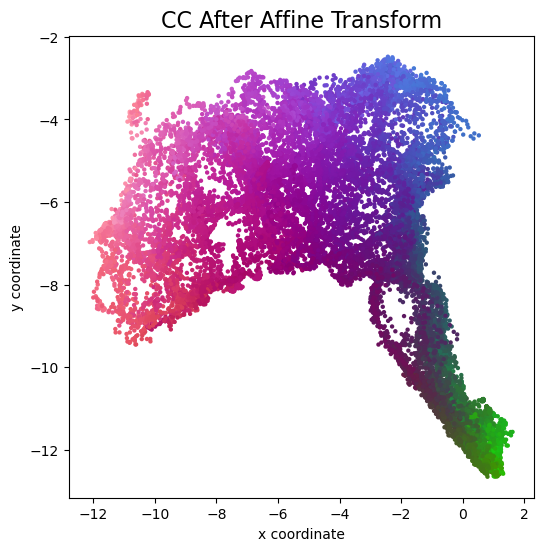

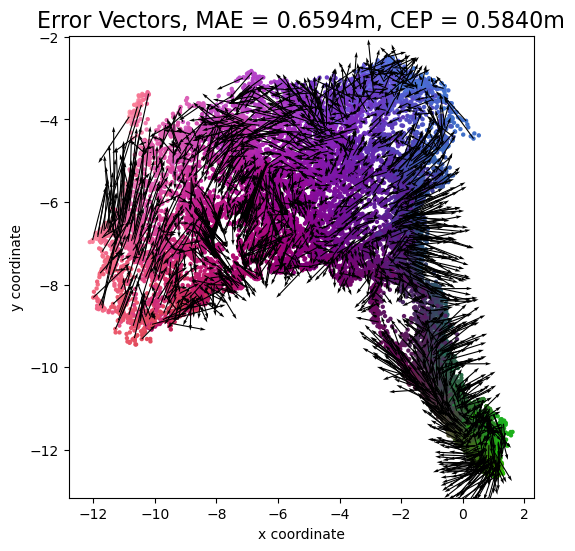

In [95]:
channel_chart_positions_transformed, errorvectors, errors, mae, cep = Evaluation.mean_absolute_error_transformed(dichasus_cf0x.groundtruth_positions, channel_chart_positions)
Evaluation.plot_colorized(channel_chart_positions_transformed, dichasus_cf0x.groundtruth_positions, title = "CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(channel_chart_positions_transformed, dichasus_cf0x.groundtruth_positions, title = f"Error Vectors, MAE = {mae:.4f}m, CEP = {cep:.4f}m", show = False)
plt.quiver(channel_chart_positions_transformed[::nth_errorvector, 0], channel_chart_positions_transformed[::nth_errorvector, 1], errorvectors[::nth_errorvector, 0], errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()

### Evaluate on Test set

In [96]:
test_set_groundtruth_positions = []
test_set_csi_time_domain = []

for csi, pos, time in dichasus_cf0x.dichasus_cf0x_testset.batch(1000):
    test_set_csi_time_domain.append(csi.numpy())
    test_set_groundtruth_positions.append(pos.numpy())

test_set_csi_time_domain = np.concatenate(test_set_csi_time_domain)
test_set_groundtruth_positions = np.concatenate(test_set_groundtruth_positions)

In [97]:
# Remove CSI from all antenna arrays except array b=2
test_set_csi_time_domain = test_set_csi_time_domain[:,1][:,np.newaxis]

In [98]:
test_set_channel_chart_positions = cc.predict(test_set_csi_time_domain)

652/652 [==============================] - 1s 2ms/step


In [99]:
ts_ct, ts_tw, ts_ks = Evaluation.ct_tw_ks_on_subset(test_set_groundtruth_positions, test_set_channel_chart_positions)
print(f"CT: {ts_ct:.4f}\nTW: {ts_tw:.4f}\nKS: {ts_ks:.4f}")

CT: 0.9858
TW: 0.9877
KS: 0.1388


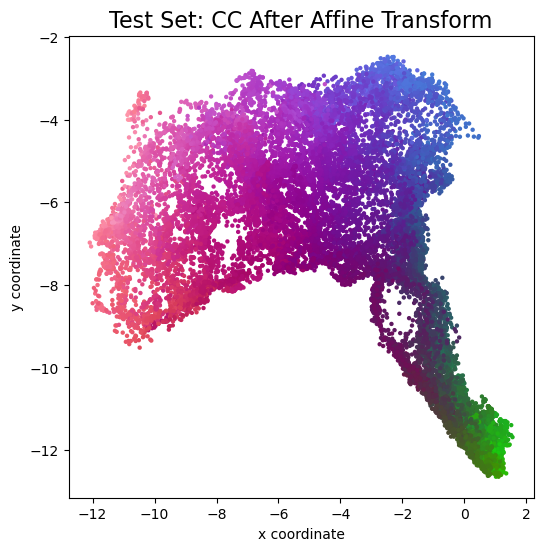

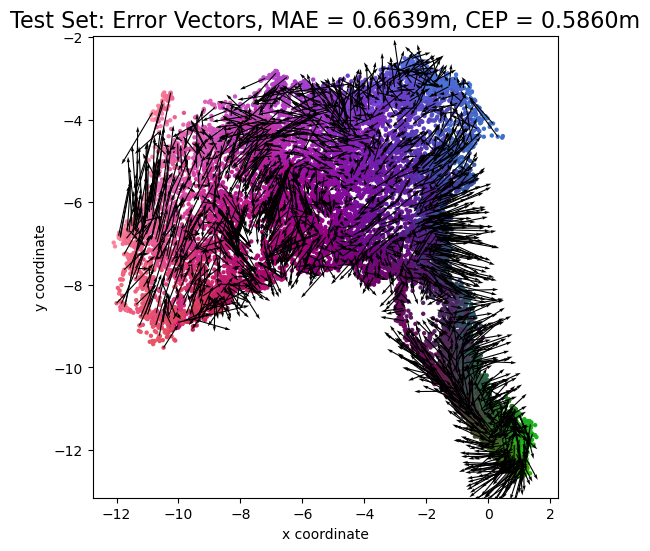

In [100]:
test_set_channel_chart_positions_transformed, ts_errorvectors, ts_errors, ts_mae, ts_cep = Evaluation.mean_absolute_error_transformed(test_set_groundtruth_positions, test_set_channel_chart_positions)
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = "Test Set: CC After Affine Transform")

nth_errorvector = 10
Evaluation.plot_colorized(test_set_channel_chart_positions_transformed, test_set_groundtruth_positions, title = f"Test Set: Error Vectors, MAE = {ts_mae:.4f}m, CEP = {ts_cep:.4f}m", show = False)
plt.quiver(test_set_channel_chart_positions_transformed[::nth_errorvector, 0], test_set_channel_chart_positions_transformed[::nth_errorvector, 1], ts_errorvectors[::nth_errorvector, 0], ts_errorvectors[::nth_errorvector, 1], color = "black", angles = "xy", scale_units = "xy", scale = 1)
plt.show()